In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import os
import glob
import pandas as pd
from scipy.optimize import curve_fit
from scipy.signal import savgol_filter
from scipy import integrate
from scipy import signal
from scipy.fftpack import fft, ifft
%matplotlib inline

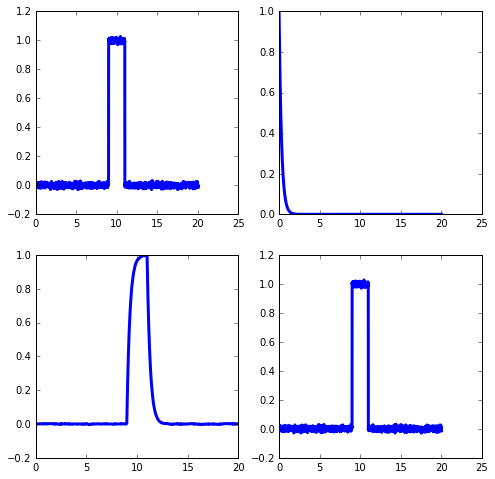

In [2]:
x = np.arange(0., 20.01, 0.01)
y = np.zeros(len(x))
y[900:1100] = 1.
y += 0.01 * np.random.randn(len(y)) #adding noise
c = np.exp(-(np.arange(len(y))) / 30)

yc = signal.convolve(y, c, mode='full') / c.sum()
ydc, remainder = signal.deconvolve(yc, c)
ydc *= c.sum()

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))
ax[0][0].plot(x, y, label="original y", lw=3)
ax[0][1].plot(x, c, label="c", lw=3)
ax[1][0].plot(x[0:2000], yc[0:2000], label="yc", lw=3)
ax[1][1].plot(x, ydc, label="recovered y", lw=3)

plt.show()

In [3]:
cd /Users/austinmcdonald/Desktop/test data/Convolution data

/Users/austinmcdonald/Desktop/test data/Convolution data


In [4]:
os.listdir()

['F1Channel-1-input00000.csv',
 'F1Channel-1-response00002.csv',
 'F1Channel-2-response00000.csv',
 'F1InputTwo00000.csv',
 'F1InputTwoCH100000.csv',
 'F1InputTwoCH200000.csv']

In [5]:
colums=['1','2','3','x','y']

In [6]:
%%time
orig = pd.read_csv('F1Channel-1-input00000.csv',delimiter=",",names=colums,skiprows=0,engine='c')


CPU times: user 3.83 ms, sys: 1.51 ms, total: 5.34 ms
Wall time: 4.99 ms


In [7]:
orig = pd.read_csv('F1Channel-1-input00000.csv',delimiter=",",names=colums,skiprows=0,engine='c')
Ch1  = pd.read_csv('F1Channel-1-response00002.csv',delimiter=",",names=colums,skiprows=0,engine='c')
Ch2  = pd.read_csv('F1Channel-2-response00000.csv',delimiter=",",names=colums,skiprows=0,engine='c')

In [8]:
orgf=fft(orig['y'])
ch1f=fft(Ch1['y'])
ch2f=fft(Ch2['y'])

In [17]:
tau=100e-12*1e6
ex = np.exp(-(np.arange(len(Ch1))) / tau)


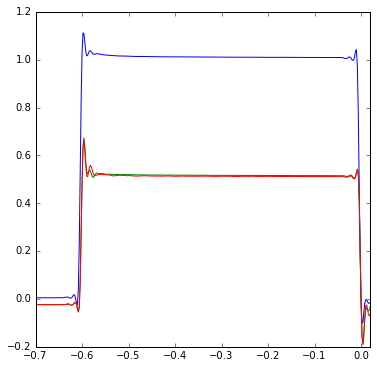

In [13]:
plt.figure(figsize=(6,6))
m=1e6
plt.plot(orig['x']*m,orig['y'])
plt.plot(Ch1['x']*m,Ch1['y'])
plt.plot(Ch2['x']*m,Ch2['y'])
plt.xlim(-0.7,.02)
plt.show()

In [10]:
x = np.arange(0., 20.01, 0.01)
y = np.zeros(len(x))
y[900:1100] = 1.
y += 0.01 * np.random.randn(len(y)) #adding noise
c = np.exp(-(np.arange(len(y))) / 30)

yc = signal.convolve(y, c, mode='full') / c.sum()
ydc, remainder = signal.deconvolve(yc, c)
ydc *= c.sum()

In [20]:
ydc

array([ 15.25138886])